Features (X): Sepal length, sepal width, petal length, and petal width.

Target (y): Three iris species (Setosa, Versicolor, and Virginica)

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on  Feb  2025

@author: Alexandra Mitronika
"""

import pandas as pd

# Load dataset from CSV
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df = pd.read_csv("iris.data", names=column_names)

# Features and labels
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Last column (species)

print(df.head())  # Preview data

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode species labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts classes to 0, 1, 2

print(label_encoder.classes_)  # To check the mapping


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


>>
>> SVM
>>

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
# stratify:ensures each class is well-represented in both train and test sets.

# Train SVM classifier with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate performance
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

y_pred_labels = label_encoder.inverse_transform(y_pred)
print(y_pred_labels[:10])  # Prints first 10 predicted class names



SVM Accuracy: 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

['Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor']


>> Random Forest

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Random Forest Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



>> We can optimise SVM [ hyperparameter tuning]:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],    # high C: risks overfitting // low C: allows some missclassifications, allows generalisation
    'gamma': ['scale', 0.01, 0.1, 1],    #influence of neighbours
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']   #check which kernel is best for our data
}

# Grid search with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best SVM parameters:", grid_search.best_params_)

# Train best model
best_svm = SVC(**grid_search.best_params_).fit(X_train, y_train)

# Evaluate optimized model
y_pred_best = best_svm.predict(X_test)
print("Optimized SVM Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))


Best SVM parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Optimized SVM Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



>> Visualizing SVM Decision Boundaries with Different Kernels

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for 2D plotting
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Step size in the mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict for each point in grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot contour and training points
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], palette="deep", edgecolor="k")
    
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(title)
    plt.show()


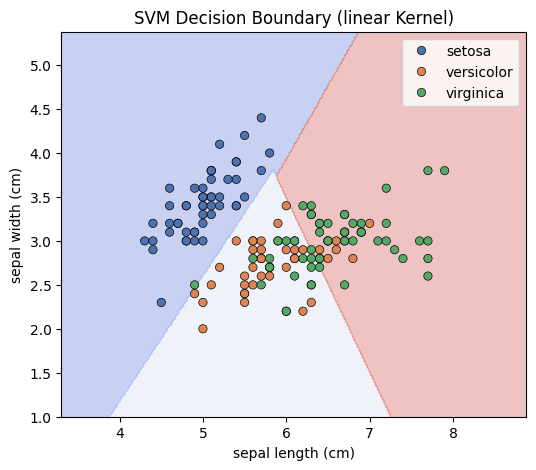

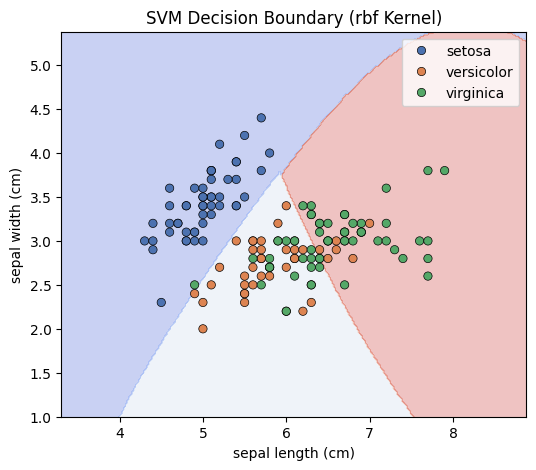

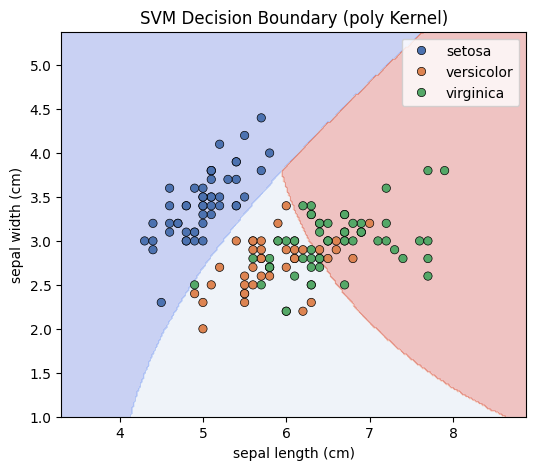

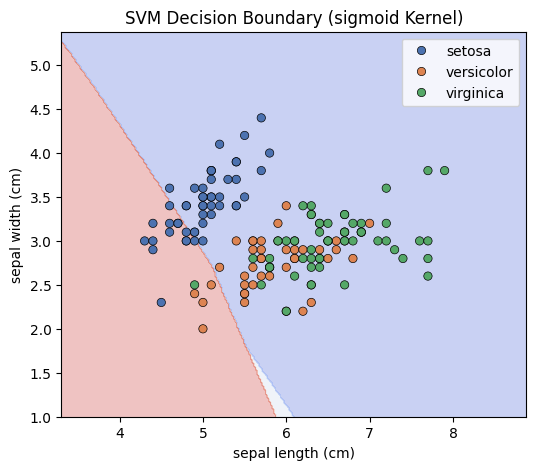

In [ ]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for kernel in kernels:
    model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    model.fit(X_train, y_train)
    plot_decision_boundary(model, X, y, f"SVM Decision Boundary ({kernel} Kernel)")



>> Visualizing Feature Importance in Random Forest

If a feature has very low importance, we could remove it and retrain for better efficiency.
<br>In our case, we didn't need to do that, because of our data sample nature and our accuracy result, but let's see it anyway.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = iris.feature_names

# Sort feature importances
sorted_indices = np.argsort(importances)[::-1]


C:\Users\Valky\AppData\Local\Temp\ipykernel_14300\2552730254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_indices], y=np.array(feature_names)[sorted_indices], palette="viridis")


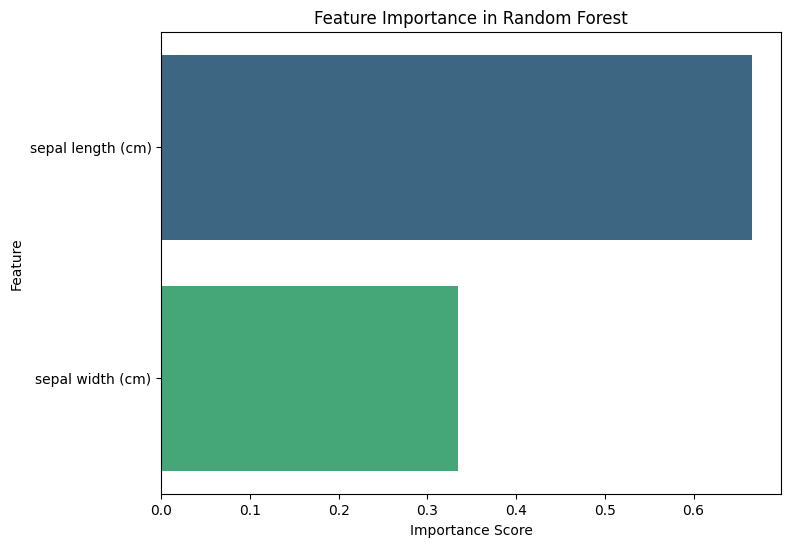

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(x=importances[sorted_indices], y=np.array(feature_names)[sorted_indices], palette="viridis")

plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()
